# Script para generación/actualización de GANTT

In [2]:
%%capture
!pip3 install python-gantt cairosvg

In [3]:
import datetime
import gantt
import pandas as pd
from IPython.display import SVG, HTML, Image, display
from cairosvg import svg2png

Estilo.

In [3]:
gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0, font_family="Verdana")

Definir fecha de inicio.

In [21]:
project_start = datetime.datetime(2021,3,5)

'05/03/2021'

Dedicación promedio: 2h por día.

In [473]:
def adjust_duration(hours):
    avg_hours_per_day = 2
    return hours/avg_hours_per_day

Definir recursos:
- Una persona que ejecuta el trabajo.
- 2 Ambientes de desarrollo:
    - HOME-DESKTOP-PC
    - WORKSTATION-GPU
    
- Todas las tareas de investigación de estudio/desarrollo involucran al desarrollador.
- Los entrenamientos del modelo requieren de WORKSTATION-GPU.

In [489]:
resources = {
    "developer": gantt.Resource('Desarrollador'),
    "gpu": gantt.Resource('GPU'),
    "edge-gpu": gantt.Resource('Edge-GPU'),
    "test-cam": gantt.Resource('Cámara de prueba'),
    "real-cam": gantt.Resource('Cámara real')
}

In [27]:
task_definitions = [
    # Lectura y relevamiento. Capacitación general. (40 hs)
    { 
        "description": "Lectura y relevamiento. Capacitación general", 
        "start": project_start,
        "duration": 40,        
        "depends_of": [],
        "resources": ["developer"],
        "responsability_assignment": ['P','C','-'],
        
        # Comunicación de avance
        "progress_indicator": "cantidad de páginas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor",
        "person_to_be_informed": "Director",
        "communication_method": "email/reunión",
    },
            
    # Bloque de recepción de video. Codificación (40 hs)
    { 
        "description": "Bloque de recepción de video. Codificación",
        "start": None,
        "duration": 40,        
        "depends_of":[],
        "resources": ["developer","test-cam"],
        "responsability_assignment": ['P','C','-'],
        
        # Comunicación de avance
        "progress_indicator": "LDC",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },
    
    # Bloque de recepción de video. Calibración y corrección (60 hs)
    { 
        "description": "Bloque de recepción de video. Calibración y corrección", 
        "start": None,
        "duration": 60,        
        "depends_of":["ID02"],
        "resources": ["developer","test-cam","real-cam"],
        "responsability_assignment": ['P','C','-'],
        
        # Comunicación de avance
        "progress_indicator": "LDC",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    # Bloque de detección.Desarrollo/entrenamiento de modelos (60 hs)
    { 
        "description": "Bloque de detección.Desarrollo/entrenamiento de modelos ", 
        "start": None,
        "duration": 60,        
        "depends_of":["ID02"],
        "resources": ["developer","gpu"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "tests/métricas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },
    
    # Milestone: Entregable PoC Detector
    { 
        "milestone": True,
        "description": "Entregable PoC Detector", 
        "start": None,
        "duration": 0,        
        "depends_of":["ID04"],
        "resources": ["developer"],
        "responsability_assignment": ['-','A','A']
    },
    
    # Bloque de detección. Integración con DeepSORT (60 hs)
    { 
        "description": "Bloque de detección. Integración con DeepSORT", 
        "start": None,
        "duration": 60,        
        "depends_of":["MS01"],
        "resources": ["developer","gpu"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "tests/métricas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Milestone: Entregable PoC con DeepSORT
    { 
        "milestone": True,
        "description": "Entregable PoC con DeepSORT", 
        "start": None,
        "duration": 0,        
        "depends_of":["ID05"],
        "resources": ["developer"],
        "responsability_assignment": ['-','A','A']
    },
    
    # Bloque de detección.Filtro final. (40 hs)
    { 
        "description": "Bloque de detección.Filtro final", 
        "start": None,
        "duration": 40,        
        "depends_of":["ID05"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "tests/métricas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Bloque de registro y generación de reportes. Implementación (60hs)
    { 
        "description": "Bloque de registro y generación de reportes. Implementación", 
        "start": None,
        "duration": 60,        
        "depends_of":["ID06"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','I'],
        
        # Comunicación de avance
        "progress_indicator": "LDC",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Iteraciones de desarrollo y mejora de modelos / selección de HPs. Scripts de conversión de formatos (20 hs)
    { 
        "description": "Iteraciones de desarrollo y mejora de modelos / selección de HPs. Scripts de conversión de formatos", 
        "start": None,
        "duration": 20,        
        "depends_of":["ID06"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "LDC, Cantidad de archivos convertidos",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Iteraciones de desarrollo y mejora de modelos / selección de HPs. Scripts de transformación de datos (20 hs)
    { 
        "description": "Iteraciones de desarrollo y mejora de modelos / selección de HPs. Scripts de transformación de datos", 
        "start": None,
        "duration": 20,        
        "depends_of":["ID06"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "tests/métricas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Iteraciones de desarrollo y mejora de modelos / selección de HPs. Gestión, organización y etiquetado de dataset (20 hs)
    { 
        "description": "Iteraciones de desarrollo y mejora de modelos / selección de HPs. Gestión, organización y etiquetado de dataset ", 
        "start": None,
        "duration": 20,        
        "depends_of":["ID06"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','S'],
        
        # Comunicación de avance
        "progress_indicator": "LDC, Cantidad de archivos preprocesados",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    # Iteraciones de desarrollo y mejora de modelos / selección de HPs. Preparación de dataset (20 hs)
    { 
        "description": "Iteraciones de desarrollo y mejora de modelos / selección de HPs. Preparación de dataset ", 
        "start": None,
        "duration": 20,        
        "depends_of":["ID06"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C','S'],
        
        # Comunicación de avance
        "progress_indicator": "LDC, Operaciones realizadas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Iteraciones de desarrollo y mejora de modelos 
    # / selección de HPs. Scripts de procesamiento de salidas/evaluación (30 hs)
    { 
        "description": "Iteraciones de desarrollo y mejora de modelos / selección de HPs. Scripts de procesamiento de salidas/evaluación ", 
        "start": None,
        "duration": 30,        
        "depends_of":["ID06"],
        "resources": ["developer","gpu"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "LDC, Cantidad de reportes generados, tests/métricas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Iteraciones de desarrollo y mejora de modelos / 
    # selección de HPs. Scripts de particionamiento de datos (30 hs)
    { 
        "description": "Iteraciones de desarrollo y mejora de modelos / selección de HPs. Scripts de particionamiento de datos ", 
        "start": None,
        "duration": 30,        
        "depends_of":["ID06"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "LDC, Cantidad de reportes generados, tests/métricas",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Integración. Despliegue en PC (30 hs)
    { 
        "description": "Integración. Despliegue en PC", 
        "start": None,
        "duration": 30,        
        "depends_of":["ID09", "ID10", "ID11", "ID12", "ID13"],
        "resources": ["developer","gpu"],
        "responsability_assignment": ['P','C','A'],
        
        # Comunicación de avance
        "progress_indicator": "LDC / cantidad de componentes integrados",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión",
    },    
    
    # Milestone: Entregable PC
    { 
        "milestone": True,
        "description": "Entregable PC", 
        "start": None,
        "duration": 0,        
        "depends_of":["ID14"],
        "resources": ["developer"],
        "responsability_assignment": ['-','A','A']
    },
    
    # Integración. Despliegue en Edge/NVIDIA Jetson/Xavier/similar (30 hs)
    { 
        "description": "Integración. Despliegue en Edge/NVIDIA Jetson/Xavier/similar", 
        "start": None,
        "duration": 30,        
        "depends_of":["MS03"],
        "resources": ["developer","edge-gpu","test-cam","real-cam"],
        "responsability_assignment": ['P','C','A'],
        
        # Comunicación de avance
        "progress_indicator": "LDC / cantidad de componentes integrados",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión"
    },    
    
    # Milestone: Entregable edge
    { 
        "milestone": True,
        "description": "Entregable EDGE", 
        "start": None,
        "duration": 0,        
        "depends_of":["ID15"],
        "resources": ["developer"],
        "responsability_assignment": ['-','A','A']
    },
    
    # Documentación. Documentación del producto (30 hs)
    { 
        "description": "Documentación. Documentación del producto", 
        "start": None,
        "duration": 30,        
        "depends_of":["MS04"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','A'],
        
        # Comunicación de avance
        "progress_indicator": "cantidad de palabras/tamaño de archivos (de texto)",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión"
    },    
    # Documentación. Memorias (30 hs)
    { 
        "description": "Documentación. Memorias", 
        "start": None,
        "duration": 30,        
        "depends_of":["ID16"],
        "resources": ["developer"],
        "responsability_assignment": ['P','C,A','-'],
        
        # Comunicación de avance
        "progress_indicator": "cantidad de palabras/tamaño de archivos (de texto)",
        "reporting_frequency": "quincenal",
        "progress_tracking_responsible": "Autor/Automatizado con SCV",
        "person_to_be_informed": "Director",
        "communication_method": "SCV/email/reunión"
    },
    
    # Milestone: Fin de Proyecto
    { 
        "milestone": True,
        "description": "Fin de proyecto", 
        "start": None,
        "duration": 0,        
        "depends_of":["ID17"],
        "resources": ["developer"],
        "responsability_assignment": ['-','A','A']
    }
]

milestone_id = 1
task_id = 1
for i in range(len(task_definitions)):
    taskdef = task_definitions[i]
    if 'milestone' not in taskdef:
        taskdef['milestone'] = False
        taskdef['task_id'] = "ID%02d" % task_id
        task_id+=1
    else:
        taskdef['task_id'] = "MS%02d" % milestone_id
        milestone_id+=1
        

df = pd.DataFrame.from_dict(task_definitions)
df_extra_info = df.copy()
df = df[['task_id','description','start','duration','depends_of','resources','responsability_assignment','milestone']]
df

,task_id,description,start,duration,depends_of,resources,responsability_assignment,milestone
0,ID01,Lectura y relevamiento. Capacitación general,2021-03-05,40,[],[developer],"[P, C, -]",False
1,ID02,Bloque de recepción de video. Codificación,NaT,40,[],"[developer, test-cam]","[P, C, -]",False
2,ID03,Bloque de recepción de video. Calibración y co...,NaT,60,[ID02],"[developer, test-cam, real-cam]","[P, C, -]",False
3,ID04,Bloque de detección.Desarrollo/entrenamiento d...,NaT,60,[ID02],"[developer, gpu]","[P, C,A, -]",False
4,MS01,Entregable PoC Detector,NaT,0,[ID04],[developer],"[-, A, A]",True
5,ID05,Bloque de detección. Integración con DeepSORT,NaT,60,[MS01],"[developer, gpu]","[P, C,A, -]",False
6,MS02,Entregable PoC con DeepSORT,NaT,0,[ID05],[developer],"[-, A, A]",True
7,ID06,Bloque de detección.Filtro final,NaT,40,[ID05],[developer],"[P, C,A, -]",False
8,ID07,Bloque de registro y generación de reportes. I...,NaT,60,[ID06],[developer],"[P, C,A, I]",False
9,ID08,Iteraciones de desarrollo y mejora de modelos ...,NaT,20,[ID06],[developer],"[P, C,A, -]",False


## 7. Diagrama Activity On Node

In [ ]:
!add-apt-repository universe
!apt update
!apt install graphviz -y
!apt-get install -y --reinstall xdg-utils

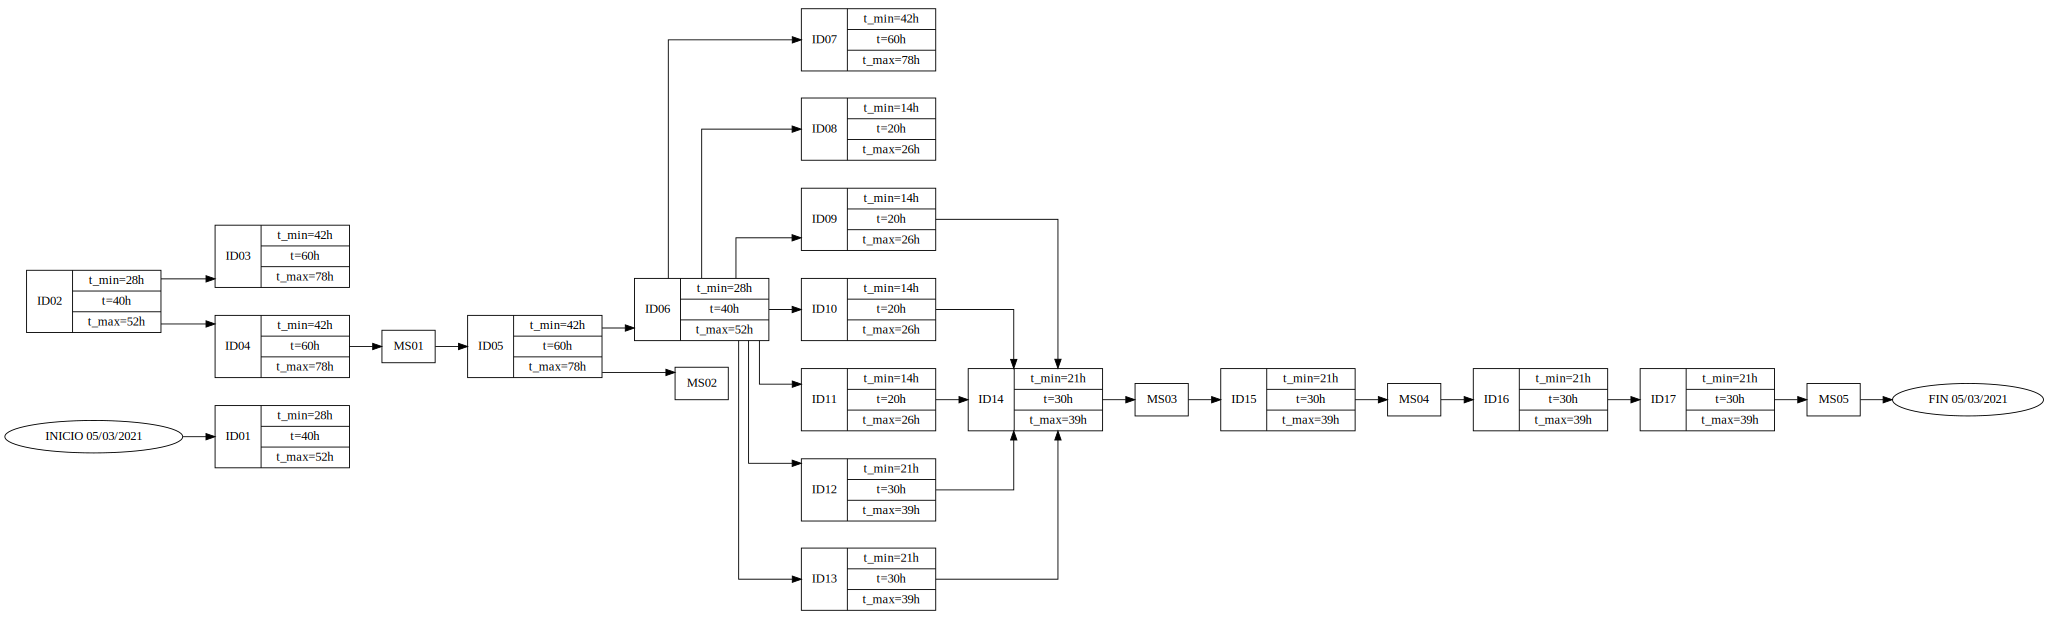

In [617]:
from graphviz import Digraph

dot_filename = 'aon.dot'
g = Digraph('aon',filename=dot_filename)
g.attr(rankdir='LR',splines='ortho',
       overlap='prism', overlap_scaling='0.01', ratio='0.3') 

# Inicio y fin
g.attr('node', shape='ellipse')
g.node("sop",label='INICIO %s' % project_start.strftime("%d/%m/%Y") )
g.node("eop",label='FIN %s' % project_start.strftime("%d/%m/%Y") )
      
# Tareas
g.attr('node', shape='record')
for row in df[~df.milestone].iterrows():
    t = row[1]["duration"]
    t_min = t - t*0.3
    t_max = t + t*0.3
    #print(row[1]["task_id"])
    g.node(row[1]["task_id"],label="{%s|{t_min=%dh|t=%dh|t_max=%dh}}" % (
        row[1]["task_id"],t_min,t,t_max )
    )
    
# Dependencias (auto)
first_task = df.iloc[0]
last_task = df.iloc[-1]
g.edge('sop', first_task["task_id"], label='')
g.edge(last_task["task_id"],'eop', label='')

for row in df.iterrows():
    for dep in row[1]["depends_of"]:                
        g.edge(dep, row[1]["task_id"], label='')
        
# Conexiones 'a mano' (FIXME!)
#g.edge("ID01", "ID02", label='')
#g.edge("ID03", "MS01", label='')


g.render(format='svg')
display(SVG(dot_filename+".svg"))    
with open(dot_filename+".svg","r") as fp:    
    svg2png(bytestring=fp.read(),write_to="aon.png")

In [546]:
!ls

Digraph.gv	gantt.png	   ram.tex	  tasks.tex
Digraph.gv.pdf	output.png	   resources.tex  test-output
Planning.ipynb	project-tasks.svg  round-table


## 8. Diagrama de Gantt

In [487]:
df["duration"].sum()

620

In [491]:
project = gantt.Project(name='Estimación de captura en buques pesqueros')

# Add tasks
gantt_tasks = {}
for row in df.iterrows():
    # Milestone
    if row[1].milestone:
        taskdef = {
            "name": row[1]["task_id"],        
            "depends_of":[gantt_tasks[k] for k in row[1]["depends_of"] ],
        }
        print(taskdef)
        gantt_tasks[taskdef["name"]] = gantt.Milestone(**taskdef)        
    else:
        task_type = "dev"
        if "gpu" in row[1]["resources"]:    
            task_type = "gpu-proc" 
        elif "edge-gpu" in row[1]["resources"]:
            task_type = "edge-gpu-proc"    

        task_type_colors = {
            "gpu-proc": "#44CCDD",
            "edge-gpu-proc": "#88CCDD",
            "dev": "#22DDCC"
        }

        taskdef = {
            "name": row[1]["task_id"],        
            "color": task_type_colors[task_type],
            "resources": [resources[k] for k in row[1]["resources"] ],
            "depends_of":[gantt_tasks[k] for k in row[1]["depends_of"] ],
            "duration": adjust_duration(row[1]["duration"])
        }

        if len(taskdef["depends_of"]) == 0:
            taskdef["start"] = datetime.datetime.now()

        print(taskdef)
        gantt_tasks[taskdef["name"]] = gantt.Task(**taskdef)
        
    project.add_task(gantt_tasks[taskdef["name"]])

{'name': 'ID01', 'color': '#22DDCC', 'resources': [<gantt.gantt.Resource object at 0x7f8ad3688130>], 'depends_of': [], 'duration': 20.0, 'start': datetime.datetime(2021, 4, 1, 13, 36, 21, 297504)}
{'name': 'ID02', 'color': '#22DDCC', 'resources': [<gantt.gantt.Resource object at 0x7f8ad3688130>, <gantt.gantt.Resource object at 0x7f8ad3688dc0>], 'depends_of': [], 'duration': 20.0, 'start': datetime.datetime(2021, 4, 1, 13, 36, 21, 298177)}
{'name': 'ID03', 'color': '#22DDCC', 'resources': [<gantt.gantt.Resource object at 0x7f8ad3688130>, <gantt.gantt.Resource object at 0x7f8ad3688dc0>, <gantt.gantt.Resource object at 0x7f8ad3688e20>], 'depends_of': [<gantt.gantt.Task object at 0x7f8ad3f2bcd0>], 'duration': 30.0}
{'name': 'ID04', 'color': '#44CCDD', 'resources': [<gantt.gantt.Resource object at 0x7f8ad3688130>, <gantt.gantt.Resource object at 0x7f8ad36885e0>], 'depends_of': [<gantt.gantt.Task object at 0x7f8ad3f2bcd0>], 'duration': 30.0}
{'name': 'MS01', 'depends_of': [<gantt.gantt.Task 

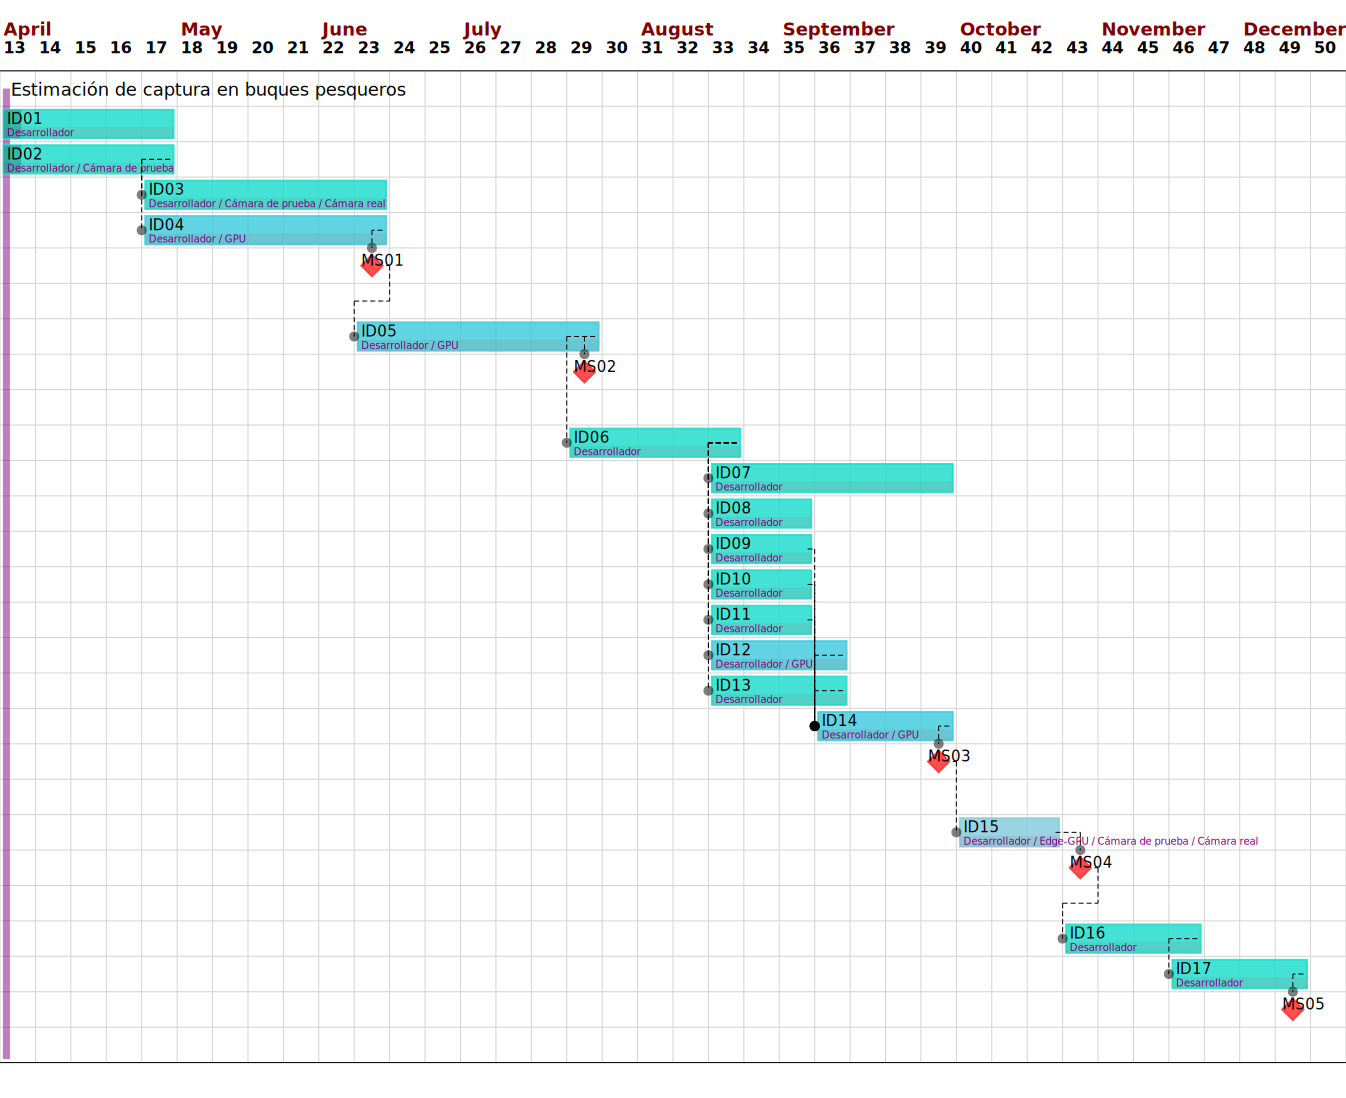

In [493]:
# Render view
svg_filename = 'project-tasks.svg'
project.title_align_on_left = False
project.make_svg_for_tasks(filename=svg_filename, 
                        today=datetime.datetime.now(), 
                        start=datetime.datetime.now(),
                        end=datetime.datetime.now()+datetime.timedelta(days=250),
                        #scale=gantt.DRAW_WITH_DAILY_SCALE
                        scale=gantt.DRAW_WITH_WEEKLY_SCALE
                        #scale=gantt.DRAW_WITH_MONTHLY_SCALE
                        #scale=gantt.DRAW_WITH_QUATERLY_SCALE
                        #scale=gantt.DRAW_WITH_WEEKLY_SCALE
)
display(SVG(svg_filename))    
with open(svg_filename,"r") as fp:    
    svg2png(bytestring=fp.read(),write_to="gantt.png")

## 9. Matriz de uso de recursos de materiales

In [494]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_resources = df[~df.milestone].copy()
df_resources = df.join(pd.DataFrame(mlb.fit_transform(df_resources.pop('resources')),
                          columns=mlb.classes_,
                          index=df_resources.index))

# Asignar a cada recurso las horas de la tarea
for x in list(resources.keys()):
    res_filter = df_resources[x]==1
    df_resources.loc[res_filter,x] = df_resources[res_filter]['duration']

# Filtrar todos los recursos que no sean el desarrollador
non_developer_resources = set(list(resources.keys())) - {"developer"}

# Filtrar las entradas que tengan algún recurso que no sea el desarrollador en uso
resources_in_use_filter = np.any(df_resources[non_developer_resources] > 0,axis=1)

# Mostrar columnas de interés
resource_columns = list(non_developer_resources)
resource_view_cols = ["task_id","description"] + resource_columns
df_resources[resource_view_cols][resources_in_use_filter]

,task_id,description,test-cam,gpu,real-cam,edge-gpu
1,ID02,Bloque de recepción de video. Codificación,40.0,0.0,0.0,0.0
2,ID03,Bloque de recepción de video. Calibración y co...,60.0,0.0,60.0,0.0
3,ID04,Bloque de detección.Desarrollo/entrenamiento d...,0.0,60.0,0.0,0.0
5,ID05,Bloque de detección. Integración con DeepSORT,0.0,60.0,0.0,0.0
13,ID12,Iteraciones de desarrollo y mejora de modelos ...,0.0,30.0,0.0,0.0
15,ID14,Integración. Despliegue en PC,0.0,30.0,0.0,0.0
17,ID15,Integración. Despliegue en Edge/NVIDIA Jetson/...,30.0,0.0,30.0,30.0


In [497]:
with open('resources.tex', 'w') as tf:
     tf.write(df_resources[resource_view_cols][resources_in_use_filter].to_latex())
df_resources[resource_view_cols][resources_in_use_filter].to_latex()

'\\begin{tabular}{lllrrrr}\n\\toprule\n{} & task\\_id &                                        description &  test-cam &   gpu &  real-cam &  edge-gpu \\\\\n\\midrule\n1  &    ID02 &         Bloque de recepción de video. Codificación &      40.0 &   0.0 &       0.0 &       0.0 \\\\\n2  &    ID03 &  Bloque de recepción de video. Calibración y co... &      60.0 &   0.0 &      60.0 &       0.0 \\\\\n3  &    ID04 &  Bloque de detección.Desarrollo/entrenamiento d... &       0.0 &  60.0 &       0.0 &       0.0 \\\\\n5  &    ID05 &      Bloque de detección. Integración con DeepSORT &       0.0 &  60.0 &       0.0 &       0.0 \\\\\n13 &    ID12 &  Iteraciones de desarrollo y mejora de modelos ... &       0.0 &  30.0 &       0.0 &       0.0 \\\\\n15 &    ID14 &                      Integración. Despliegue en PC &       0.0 &  30.0 &       0.0 &       0.0 \\\\\n17 &    ID15 &  Integración. Despliegue en Edge/NVIDIA Jetson/... &      30.0 &   0.0 &      30.0 &      30.0 \\\\\n\\bottomrule\n\\end{

## 10. Presupuesto detallado del proyecto

In [645]:
direct_costs = [
    {
        "description": "NVIDIA Jetson AGX Xavier Developer Kit (32GB)",
        "q":           1,
        "price":       899 *91.68 * 2
    },
    
    {
        "description": "HIKVISION 4MPX PoE Outdoor Camera",
        "q":           1,
        "price":       125.00*91.68 * 2
    },
    
    {
        "description": "Desarrollo/ingeniería (HH)",
        "q":           620,
        "price":       3000
    },
    
    {
        "description": "Varios. Chasis, fichas, conectores, etc.",
        "q":           1,
        "price":       30000
    },
    
]
df_direct_costs = pd.DataFrame.from_dict(direct_costs)
df_direct_costs['total'] = df_direct_costs['price']* df_direct_costs['q']
df_direct_costs

,description,q,price,total
0,NVIDIA Jetson AGX Xavier Developer Kit (32GB),1,164840.64,164840.64
1,HIKVISION 4MPX PoE Outdoor Camera,1,22920.00,22920.00
2,Desarrollo/ingeniería (HH),620,3000.00,1860000.00
3,"Varios. Chasis, fichas, conectores, etc.",1,30000.00,30000.00


In [646]:
df_direct_costs['total'].sum()

2077760.6400000001

In [643]:
indirect_costs = [
    {
        "description": "Alquiler oficina c/ servicios (mensual)",
        "q":           8,
        "price":       45000
    },
    
    {
        "description": "Servicio de cómputo (mensual)",
        "q":           8,
        "price":       350.0*91.68 * 2
    },
    
    {
        "description": "Insumos  ",
        "q":           8,
        "price":       3000
    },
    
    {
        "description": "Consultoría legal",
        "q":           2,
        "price":       14000
    },
    
]

df_indirect_costs = pd.DataFrame.from_dict(indirect_costs)
df_indirect_costs['total'] = df_indirect_costs['price']* df_indirect_costs['q']
df_indirect_costs

,description,q,price,total
0,Alquiler oficina c/ servicios (mensual),8,45000.0,360000.0
1,Servicio de cómputo (mensual),8,64176.0,513408.0
2,Insumos,8,3000.0,24000.0
3,Consultoría legal,2,14000.0,28000.0


In [653]:
350.0  / 1.35

259.25925925925924

In [644]:
df_indirect_costs['total'].sum()

925408.0

In [647]:
df_direct_costs['total'].sum() + df_indirect_costs['total'].sum()

3003168.64

## 11. Matriz de asignación de responsabilidades

In [456]:
df_ram = df[~df.milestone].copy()
df_ram["responsable"] =  df_ram.apply(lambda row: row["responsability_assignment"][0],axis=1)
df_ram["tutor"] =  df_ram.apply(lambda row: row["responsability_assignment"][1],axis=1)
df_ram["client"] = df_ram.apply(lambda row: row["responsability_assignment"][2],axis=1)
df_ram[['task_id','description','responsable','tutor','client']]

,task_id,description,responsable,tutor,client
0,ID01,Lectura y relevamiento. Capacitación general,P,C,-
1,ID02,Bloque de recepción de video. Codificación,P,C,-
2,ID03,Bloque de recepción de video. Calibración y co...,P,C,-
3,ID04,Bloque de detección.Desarrollo/entrenamiento d...,P,"C,A",-
5,ID05,Bloque de detección. Integración con DeepSORT,P,"C,A",-
7,ID06,Bloque de detección.Filtro final,P,"C,A",-
8,ID07,Bloque de registro y generación de reportes. I...,P,"C,A",I
9,ID08,Iteraciones de desarrollo y mejora de modelos ...,P,"C,A",-
10,ID09,Iteraciones de desarrollo y mejora de modelos ...,P,"C,A",-
11,ID10,Iteraciones de desarrollo y mejora de modelos ...,P,"C,A",S


In [499]:
with open('ram.tex', 'w') as tf:
     tf.write(df_ram[['task_id','description','responsable','tutor','client']].to_latex())
df_ram[['task_id','description','responsable','tutor','client']].to_latex()        

'\\begin{tabular}{llllll}\n\\toprule\n{} & task\\_id &                                        description & responsable & tutor & client \\\\\n\\midrule\n0  &    ID01 &       Lectura y relevamiento. Capacitación general &           P &     C &      - \\\\\n1  &    ID02 &         Bloque de recepción de video. Codificación &           P &     C &      - \\\\\n2  &    ID03 &  Bloque de recepción de video. Calibración y co... &           P &     C &      - \\\\\n3  &    ID04 &  Bloque de detección.Desarrollo/entrenamiento d... &           P &   C,A &      - \\\\\n5  &    ID05 &      Bloque de detección. Integración con DeepSORT &           P &   C,A &      - \\\\\n7  &    ID06 &                   Bloque de detección.Filtro final &           P &   C,A &      - \\\\\n8  &    ID07 &  Bloque de registro y generación de reportes. I... &           P &   C,A &      I \\\\\n9  &    ID08 &  Iteraciones de desarrollo y mejora de modelos ... &           P &   C,A &      - \\\\\n10 &    ID09 &  Iterac

## 16. Seguimiento y control

Tarea del WBS & Indicador de avance & Frecuencia de reporte & Resp. de seguimiento & Persona a ser informada & Método de comunic. \\ \hline
\endhead

In [35]:
communication_cols = ["task_id",
                      "description",
                      "progress_indicator",
                      "reporting_frequency",
                      "progress_tracking_responsible",
                      "person_to_be_informed",
                      "communication_method"]
for row in df_extra_info[~df_extra_info.milestone][communication_cols].iterrows():
    row = row[1]
    print("%s & %s & %s & %s & %s & %s \\\\ \\hline " %
          ( row["task_id"],
            row["progress_indicator"],
            row["reporting_frequency"],
            row["progress_tracking_responsible"],
            row["person_to_be_informed"],
            row["communication_method"] )
         
)

ID01 & cantidad de páginas & quincenal & Autor & Director & email/reunión \\ \hline 
ID02 & LDC & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID03 & LDC & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID04 & tests/métricas & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID05 & tests/métricas & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID06 & tests/métricas & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID07 & LDC & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID08 & LDC, Cantidad de archivos convertidos & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID09 & tests/métricas & quincenal & Autor/Automatizado con SCV & Director & SCV/email/reunión \\ \hline 
ID10 & LDC, Cantidad de archivos preprocesados & quincenal & Autor/Automatizado con S

## Tests

## Risk analysis

In [6]:
risks_data = {
    "1. Datos insuficientes": { "S": 10, "O": 6,"me_s": 0.5, "me_o": 1. },
    "2. Bajo desempeño de modelos.": { "S": 10, "O": 4,"me_s": .5,"me_o": .5 },
    "3. Costo excesivo.": { "S": 5, "O": 9,"me_s": .5,"me_o": .5 },
    "4. Falta de recursos.": { "S": 6, "O": 3,"me_s": 1.,"me_o": 1. },
    "5. Alcance errado.": { "S": 2, "O": 9,"me_s": 1.,"me_o": 1. },
}
    
risks_df = pd.DataFrame.from_dict(risks_data,orient='index')
risks_df["RPN"] = (risks_df["S"]*risks_df["O"]).astype(int)
risks_df["S*"] = (risks_df["S"]*risks_df["me_s"]).astype(int)
risks_df["O*"] = (risks_df["O"]*risks_df["me_o"]).astype(int)
risks_df["RPN*"] = (risks_df["S*"]*risks_df["O*"]).astype(int)
risks_df

,S,O,me_s,me_o,RPN,S*,O*,RPN*
1. Datos insuficientes,10,6,0.5,1.0,60,5,6,30
2. Bajo desempeño de modelos.,10,4,0.5,0.5,40,5,2,10
3. Costo excesivo.,5,9,0.5,0.5,45,2,4,8
4. Falta de recursos.,6,3,1.0,1.0,18,6,3,18
5. Alcance errado.,2,9,1.0,1.0,18,2,9,18


In [ ]:
}

Riesgo                        & S  &  O & RPN & S* & O* & RPN* \\ \hline
1. Datos insuficientes. 	  & 10 &  6 &     &    &    &      \\ \hline
2. Bajo desempeño de modelos. & 10 &  4 &     &    &    &      \\ \hline
3. Costo excesivo. 			  &  5 &  9 &     &    &    &      \\ \hline
4. Falta de recursos. 		  &  6 &  3 &     &    &    &      \\ \hline
5. Alcance errado. 			  &  2 &  9 &     &    &    &      \\ \hline

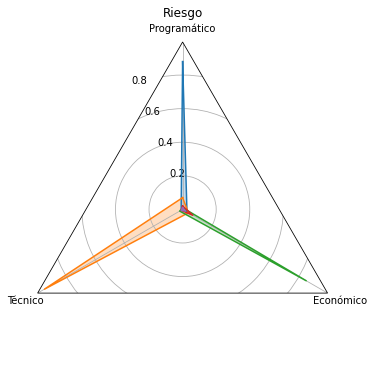

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


data = [['Programático', 'Técnico', 'Económico'],
        ('Riesgo', [
            [0.88, 0.01, 0.03],
            [0.07, 0.95, 0.04],
            [0.01, 0.02, 0.85],
            [0.02, 0.01, 0.07],
            [0.01, 0.01, 0.02]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()

a) Identificación de los riesgos (al menos cinco) y estimación de sus consecuencias:
Riesgo 1: detallar el riesgo (riesgo es algo que si ocurre altera los planes previstos)
Severidad (S): mientras más severo, más alto es el número (usar números del 1 al 10).
Justificar el motivo por el cual se asigna determinado número de severidad (S).
Probabilidad de ocurrencia (O): mientras más probable, más alto es el número (usar del
1 al 10).
Justificar el motivo por el cual se asigna determinado número de (O).